## Introducción – Caso ejercicio

**Empresa de micromovilidad:**

Luego de un exitoso lanzamiento en el mercado, ahora es el momento de expandir
nuestras operaciones en Latam. Estamos enfrentando un gran desafío y queremos
contar con el mejor talento para lograrlo.

**Ejercicio 1: Análisis de Datos**

En este ejercicio, recibirás un archivo .csv que contiene información sobre 30,000
registros de transacciones. Aunque entender el significado de cada campo es parte del
reto, te damos dos recomendaciones clave:
1. Los campos "id" contienen identificadores únicos, en formato alfanumérico en
lugar de nombres.
2. Las horas están representadas en UTC, por lo que debes tener cuidado con los
valores de precios, distancias y duración de las transacciones.

**¿Qué esperamos?**

Queremos un análisis exhaustivo (no trivial) que nos ayude a tomar mejores decisiones.
Te pedimos que nos presentes tu interpretación de los datos y realices propuestas
basadas en tu análisis. Por ejemplo:
* ¿Dónde y en qué horarios deberíamos desplegar nuestros recursos?
* ¿Cómo es nuestra tasa de ocupación? ¿Cómo podríamos mejorarla?
* ¿Cómo optimizar la eficiencia operativa de nuestros procesos?
* ¿Nuestros clientes son lo suficientemente leales al servicio? Analiza hipótesis y conclusiones.
* ¿Qué clientes deberíamos retener? ¿Qué clientes deberíamos reactivar?
* Después de analizar estos datos, ¿qué plan de crecimiento o decisiones tomarías
para fortalecer la operación?

## Solución

Verificamos que la versión de Python sea superior a Python 3.7

In [35]:
import sys

assert sys.version_info >= (3, 7)

Vamos a considerar Scikit-Learn superior a 1.0.1

In [36]:
from packaging import version
import sklearn 

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [37]:
from pathlib import Path
import pandas as pd

data = pd.read_csv(Path("datasets/data.csv"), delimiter=";")

### Análisis Exploratorio

In [38]:
data.head()

,id,vehicleId,userId,started,finished,start-lat,start-lng,finish-lat,finish-lng,duration,distance,price,discount
0,133315,1695,7877,31/10/2018 19:35,31/10/2018 20:05,40.456257,-3.686564,40.389175,-3.700365,1674,8.956865,9.4,0.0
1,133314,1859,14094,31/10/2018 19:36,31/10/2018 19:49,40.458176,-3.689697,40.432705,-3.687013,616,3.566627,3.4,0.0
2,133326,1825,7051,31/10/2018 19:39,31/10/2018 19:47,40.408684,-3.704980,40.419201,-3.707428,312,1.461767,3.4,0.0
3,133329,1685,18903,31/10/2018 19:40,31/10/2018 19:49,40.393757,-3.678563,40.402515,-3.698830,376,2.590610,3.4,0.0
4,133320,1754,6439,31/10/2018 19:42,31/10/2018 19:53,40.444302,-3.722853,40.427330,-3.701738,557,4.152054,3.4,0.0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          30000 non-null  int64  
 1   vehicleId   30000 non-null  int64  
 2   userId      30000 non-null  int64  
 3   started     30000 non-null  object 
 4   finished    30000 non-null  object 
 5   start-lat   30000 non-null  float64
 6   start-lng   30000 non-null  float64
 7   finish-lat  30000 non-null  float64
 8   finish-lng  30000 non-null  float64
 9   duration    30000 non-null  int64  
 10  distance    30000 non-null  float64
 11  price       30000 non-null  float64
 12  discount    30000 non-null  float64
dtypes: float64(7), int64(4), object(2)
memory usage: 3.0+ MB


Transformamos el tipo de dato de las columnas started y finished

In [40]:
data['started'] = pd.to_datetime(data['started'], utc=True)
data['finished'] = pd.to_datetime(data['finished'], utc=True)

C:\Users\jesus.montalvo\AppData\Local\Temp\ipykernel_17976\3558324408.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['started'] = pd.to_datetime(data['started'], utc=True)
C:\Users\jesus.montalvo\AppData\Local\Temp\ipykernel_17976\3558324408.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['finished'] = pd.to_datetime(data['finished'], utc=True)


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   id          30000 non-null  int64              
 1   vehicleId   30000 non-null  int64              
 2   userId      30000 non-null  int64              
 3   started     30000 non-null  datetime64[ns, UTC]
 4   finished    30000 non-null  datetime64[ns, UTC]
 5   start-lat   30000 non-null  float64            
 6   start-lng   30000 non-null  float64            
 7   finish-lat  30000 non-null  float64            
 8   finish-lng  30000 non-null  float64            
 9   duration    30000 non-null  int64              
 10  distance    30000 non-null  float64            
 11  price       30000 non-null  float64            
 12  discount    30000 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(7), int64(4)
memory usage: 3.0 MB


In [42]:
data.head()

,id,vehicleId,userId,started,finished,start-lat,start-lng,finish-lat,finish-lng,duration,distance,price,discount
0,133315,1695,7877,2018-10-31 19:35:00+00:00,2018-10-31 20:05:00+00:00,40.456257,-3.686564,40.389175,-3.700365,1674,8.956865,9.4,0.0
1,133314,1859,14094,2018-10-31 19:36:00+00:00,2018-10-31 19:49:00+00:00,40.458176,-3.689697,40.432705,-3.687013,616,3.566627,3.4,0.0
2,133326,1825,7051,2018-10-31 19:39:00+00:00,2018-10-31 19:47:00+00:00,40.408684,-3.704980,40.419201,-3.707428,312,1.461767,3.4,0.0
3,133329,1685,18903,2018-10-31 19:40:00+00:00,2018-10-31 19:49:00+00:00,40.393757,-3.678563,40.402515,-3.698830,376,2.590610,3.4,0.0
4,133320,1754,6439,2018-10-31 19:42:00+00:00,2018-10-31 19:53:00+00:00,40.444302,-3.722853,40.427330,-3.701738,557,4.152054,3.4,0.0


In [43]:
data.describe()

,id,vehicleId,userId,start-lat,start-lng,finish-lat,finish-lng,duration,distance,price,discount
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,153638.970333,1330.445700,14267.534333,40.432522,-3.694805,40.432501,-3.694868,633.904767,3.406618,2.684774,0.710653
std,11825.409246,654.661455,7727.489184,0.019977,0.016024,0.020053,0.016005,666.402095,2.136407,4.032774,1.613483
min,133314.000000,373.000000,682.000000,40.385281,-3.735411,40.373287,-3.757609,-113.000000,0.000000,0.000000,0.000000
25%,143428.750000,472.000000,7313.000000,40.419285,-3.706875,40.419098,-3.706980,351.000000,1.991590,0.000000,0.000000
50%,153532.000000,1719.000000,15167.000000,40.431852,-3.696584,40.431797,-3.696684,562.000000,3.169754,2.700000,0.000000
75%,163926.500000,1857.000000,21050.000000,40.446381,-3.682814,40.446407,-3.682984,810.000000,4.568254,3.400000,0.000000
max,174224.000000,1938.000000,27487.000000,40.492500,-3.630968,40.550777,-3.614737,34616.000000,29.647694,222.800000,55.400000


Definimos la ruta para guardar las imágenes generadas en el análisis y una función para generar las imágenes con una buena resolución

In [44]:
IMAGES_PATH = Path() / "images" / "reto_banco_alfin"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [45]:
float_columns = data.select_dtypes(include=['float64', 'float32'])

float_columns

,start-lat,start-lng,finish-lat,finish-lng,distance,price,discount
0,40.456257,-3.686564,40.389175,-3.700365,8.956865,9.4,0.0
1,40.458176,-3.689697,40.432705,-3.687013,3.566627,3.4,0.0
2,40.408684,-3.704980,40.419201,-3.707428,1.461767,3.4,0.0
3,40.393757,-3.678563,40.402515,-3.698830,2.590610,3.4,0.0
4,40.444302,-3.722853,40.427330,-3.701738,4.152054,3.4,0.0
...,...,...,...,...,...,...,...
29995,40.443874,-3.664954,40.439388,-3.672453,0.884601,3.4,0.0
29996,40.438801,-3.680930,40.454193,-3.687410,2.156245,3.4,0.0
29997,40.410332,-3.717959,40.403625,-3.713005,1.105995,3.4,0.0
29998,40.460144,-3.672118,40.468369,-3.686520,1.879957,3.4,0.0


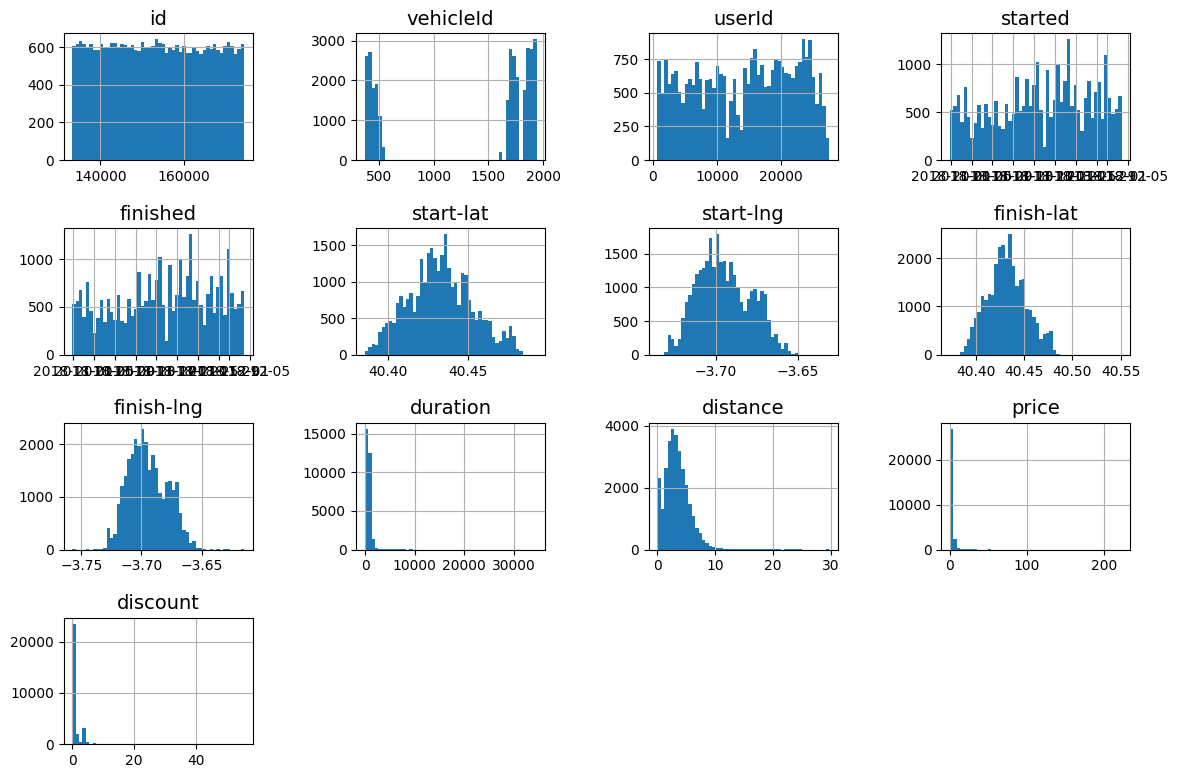

In [46]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
save_fig("histogramas_de_los_atributos")
plt.show()

### ¿Dónde y en qué horarios deberíamos desplegar nuestros recursos?

**Análisis de series temporales**

In [47]:
import seaborn as sns

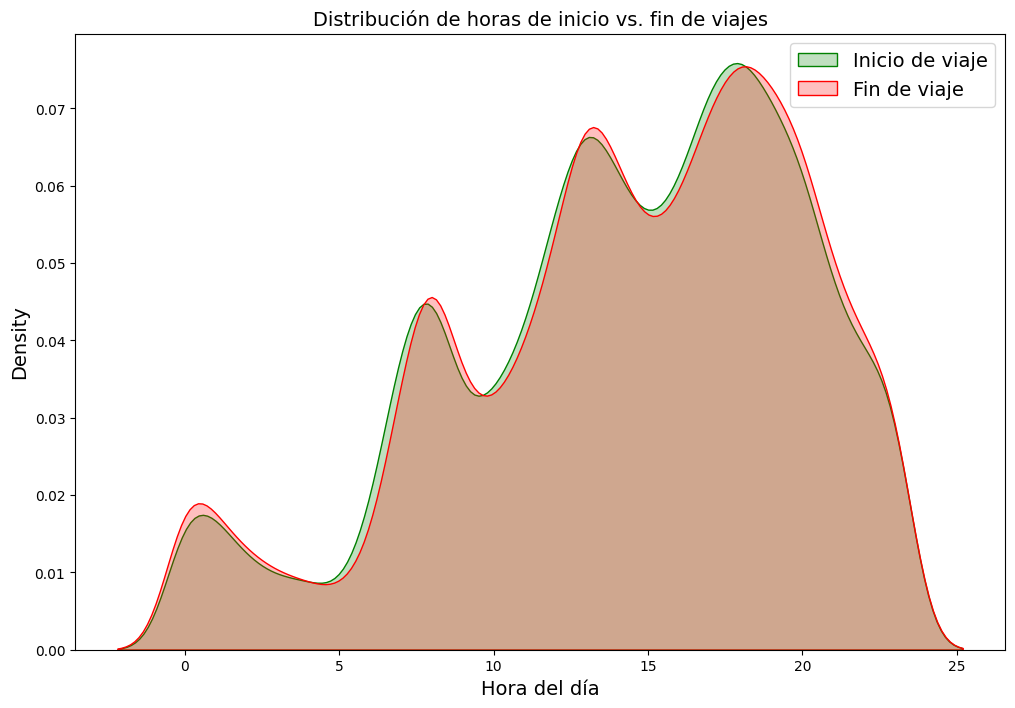

In [54]:
data['hour_started'] = data['started'].dt.hour
data['hour_finished'] = data['finished'].dt.hour

# Comparar distribuciones
plt.figure(figsize=(12, 8))
sns.kdeplot(data['hour_started'], label='Inicio de viaje', fill=True, color='green')
sns.kdeplot(data['hour_finished'], label='Fin de viaje', fill=True, color='red')
plt.xlabel('Hora del día')
plt.legend()
plt.title('Distribución de horas de inicio vs. fin de viajes')
plt.show()

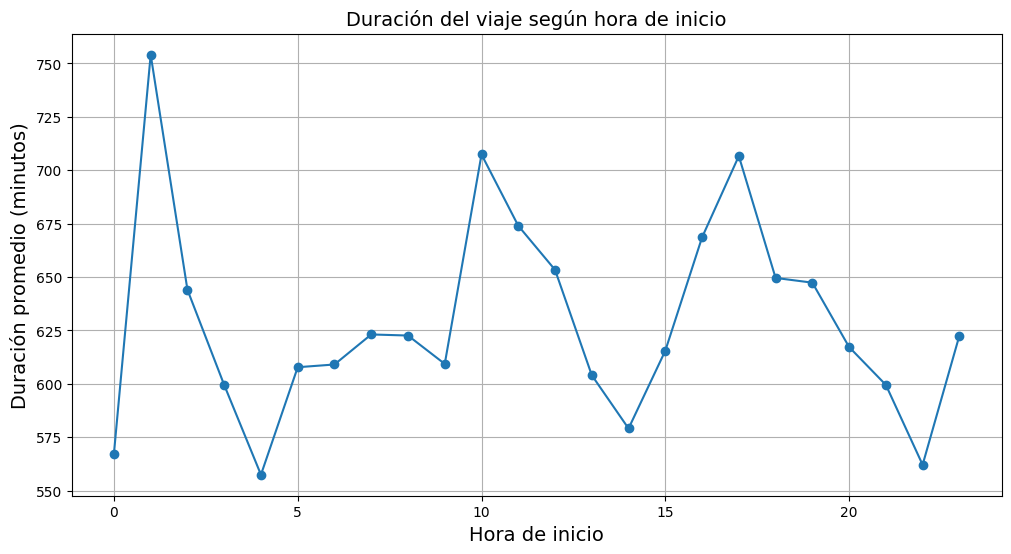

In [53]:
duration_by_hour = data.groupby('hour_started')['duration'].mean()

plt.figure(figsize=(12, 6))
duration_by_hour.plot(marker='o')
plt.xlabel('Hora de inicio')
plt.ylabel('Duración promedio (minutos)')
plt.title('Duración del viaje según hora de inicio')
plt.grid()
plt.show()

C:\Users\jesus.montalvo\AppData\Local\Temp\ipykernel_17976\2241141244.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  start=data['started'].min().floor('H'),
C:\Users\jesus.montalvo\AppData\Local\Temp\ipykernel_17976\2241141244.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  end=data['finished'].max().ceil('H'),
C:\Users\jesus.montalvo\AppData\Local\Temp\ipykernel_17976\2241141244.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hours_range = pd.date_range(


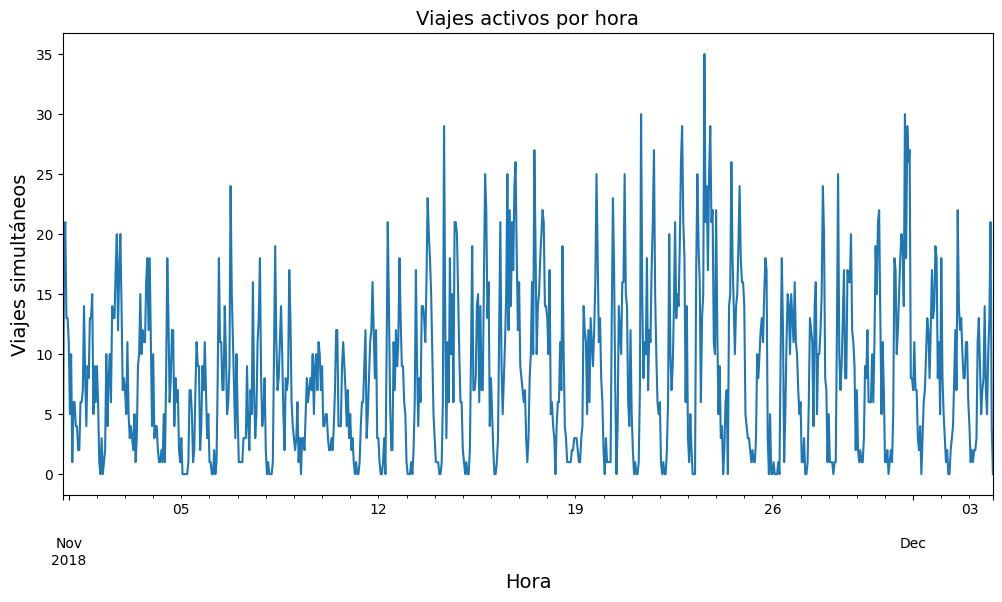

In [55]:
from datetime import datetime, timedelta

# Crear rango de horas completas
hours_range = pd.date_range(
    start=data['started'].min().floor('H'),
    end=data['finished'].max().ceil('H'),
    freq='H'
)

# Contar viajes activos por hora
active_trips = []
for hour in hours_range:
    active = data[(data['started'] <= hour) & (data['finished'] >= hour)]
    active_trips.append(len(active))

active_series = pd.Series(active_trips, index=hours_range)

# Graficar
active_series.plot(figsize=(12, 6), title='Viajes activos por hora')
plt.xlabel('Hora')
plt.ylabel('Viajes simultáneos')
plt.show()